In [33]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

#data splitting
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#to perform tuning of hyperparameters
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#data modelling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score

#Algorithms to build a machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#ensembling
from mlxtend.classifier import StackingCVClassifier
import xgboost as xgb
import itertools
from sklearn.dummy import DummyClassifier
from sklearn import metrics

pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

In [34]:
#Download dataset from kaggle source and read and store the dataset - cleveland
df1 = pd.read_csv("heart.csv")

#Read dataset from UCI Machine Learning Repository - hungarian dataset
df2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data",
                names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"])

In [35]:
df1.shape

(303, 14)

In [36]:
df2.shape

(294, 14)

In [37]:
#Combining two dataframes
frames = [df1, df2]
df = pd.concat(frames)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
df.shape

(597, 14)

In [39]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1
293,65,1,4,130,275,0,1,115,1,1.0,2,?,?,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       597 non-null    int64  
 1   sex       597 non-null    int64  
 2   cp        597 non-null    int64  
 3   trestbps  597 non-null    object 
 4   chol      597 non-null    object 
 5   fbs       597 non-null    object 
 6   restecg   597 non-null    object 
 7   thalach   597 non-null    object 
 8   exang     597 non-null    object 
 9   oldpeak   597 non-null    float64
 10  slope     597 non-null    object 
 11  ca        597 non-null    object 
 12  thal      597 non-null    object 
 13  target    597 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 70.0+ KB


In [41]:
df=df.replace('?',np.NaN)

In [42]:
df.isna().sum()

age         0  
sex         0  
cp          0  
trestbps    1  
chol        23 
fbs         8  
restecg     1  
thalach     1  
exang       1  
oldpeak     0  
slope       190
ca          291
thal        266
target      0  
dtype: int64

In [43]:
#Replacing all NaN values with mean values
df = df.astype(float)
col_mean = np.nanmean(df, axis = 0)
df['chol'] = df['chol'].fillna(col_mean[4])
df['trestbps'] = df['trestbps'].fillna(col_mean[3])
df['fbs'] = df['fbs'].fillna(col_mean[5])
df['restecg'] = df['restecg'].fillna(col_mean[6])
df['thalach'] = df['thalach'].fillna(col_mean[7])
df['exang'] = df['exang'].fillna(col_mean[8])
df['slope'] = df['slope'].fillna(col_mean[10])
df['ca'] = df['ca'].fillna(col_mean[11])
df['thal'] = df['thal'].fillna(col_mean[12])

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [45]:
X = df.drop(['target'],axis=1)
y = df['target']
print(X.head())
print(y.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  3.0  145.0     233.0  1.0  0.0      150.0    0.0    2.3       
1  37.0  1.0  2.0  130.0     250.0  0.0  1.0      187.0    0.0    3.5       
2  41.0  0.0  1.0  130.0     204.0  0.0  0.0      172.0    0.0    1.4       
3  56.0  1.0  1.0  120.0     236.0  0.0  1.0      178.0    0.0    0.8       
4  57.0  0.0  0.0  120.0     354.0  0.0  1.0      163.0    1.0    0.6       

   slope   ca  thal  
0  0.0    0.0  1.0   
1  0.0    0.0  2.0   
2  2.0    0.0  2.0   
3  2.0    0.0  2.0   
4  2.0    0.0  2.0   
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64


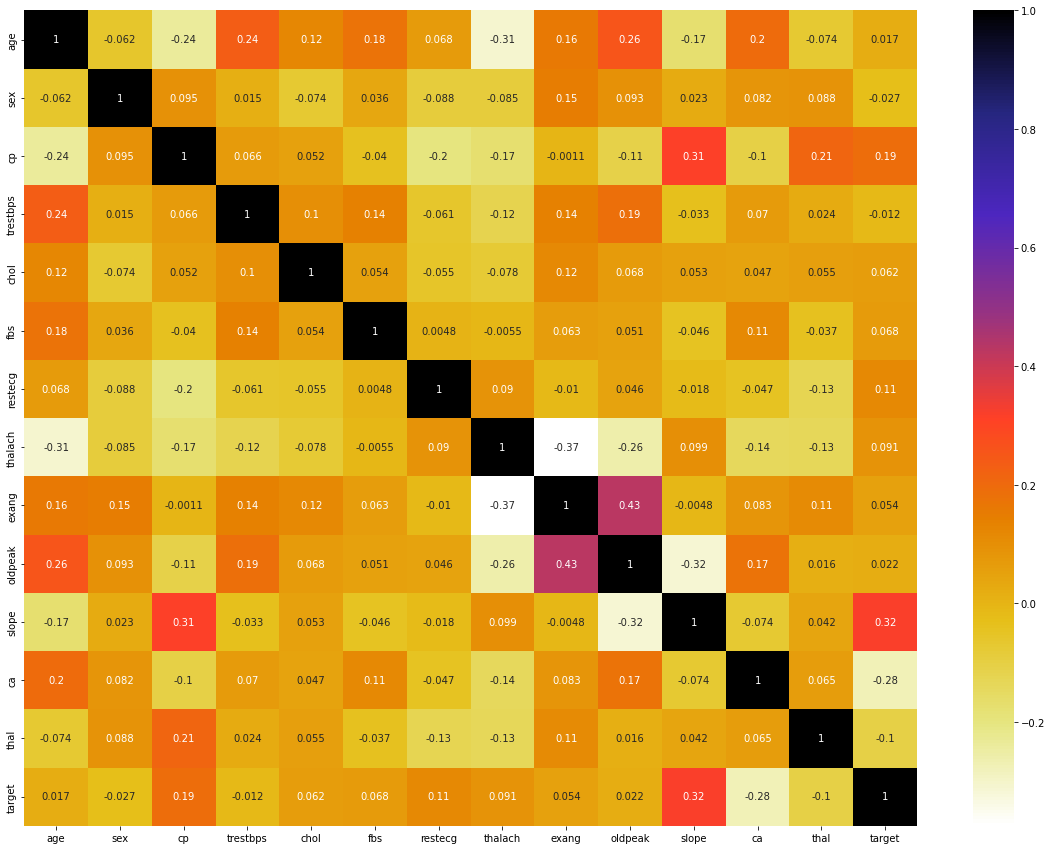

In [46]:
#Feature Selection
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = df.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [47]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if((corr_matrix.iloc[i,j]) > threshold):  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df, 0.7)
len(set(corr_features))

0

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.5888888888888889

In [50]:
# from skfeature.function.similarity_based import fisher_score
# import matplotlib.pyplot as plt
# %matplotlib inline

# ranks = fisher_score.fisher_score(X_train,y_train)

# feat_imp = pd.Series(ranks,df.columns[0:len(df.columns)-1])
# feat_imp.plot(kind='barh',color='teal')
# plt.show()

In [19]:
#tuning hyperparameters - Decision tree
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}
gridDT = GridSearchCV(DecisionTreeClassifier(),param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
gridDT.fit(X_train,y_train)
gridDT.best_params_

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [52]:
# INSATNTIATE DECISION TREE MODEL
tree = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=4,min_samples_split=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
tree_acc_score=metrics.accuracy_score(y_test, y_pred_tree)
tree_f1_score=metrics.f1_score(y_test, y_pred_tree)
tree_conf_matrix=confusion_matrix(y_test,y_pred_tree)
# checking accuracy
print('Test Accuracy score: ', tree_acc_score)
print('Test F1 score: ', tree_f1_score)
print("confusion matrix")
print(tree_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_tree))

Test Accuracy score:  0.85
Test F1 score:  0.830188679245283
confusion matrix
[[87 21]
 [ 6 66]]


              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       108
         1.0       0.76      0.92      0.83        72

    accuracy                           0.85       180
   macro avg       0.85      0.86      0.85       180
weighted avg       0.86      0.85      0.85       180



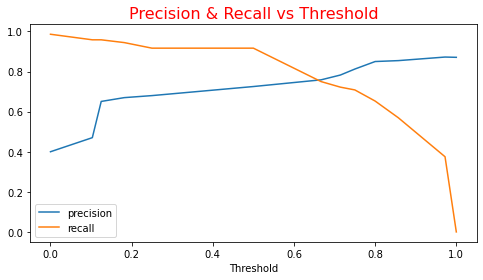

In [53]:
prob_train = np.squeeze(tree.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(tree.predict_proba(X_test)[:,1].reshape(1,-1))
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show() 

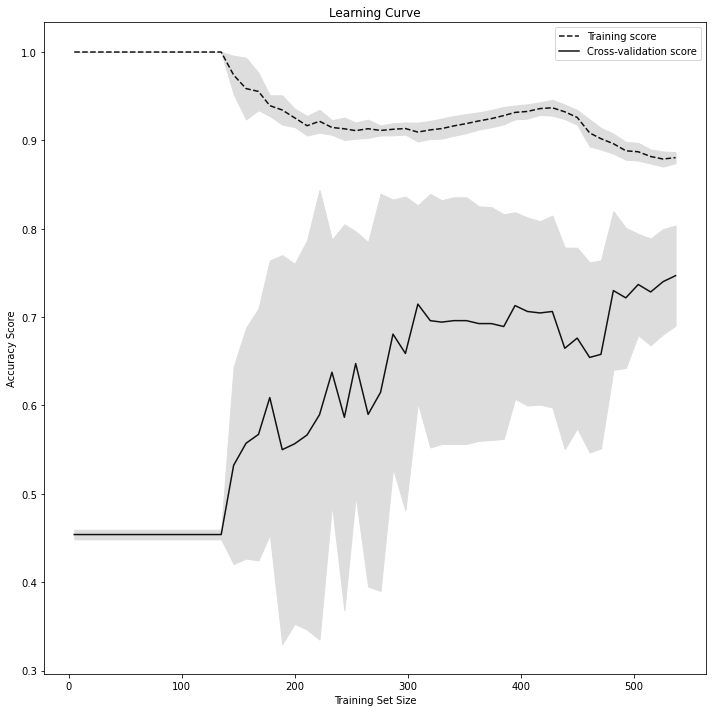

In [54]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(tree, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
    
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [22]:
#Raondom Forest - tuning hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X,y)

rdsearch_scores = []
rdsearch_scores.append({
        'best_score': rf_random.best_score_,
        'best_params': rf_random.best_params_
    })

hyper_df = pd.DataFrame(rdsearch_scores,columns=['best_score','best_params'])
hyper_df

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


,best_score,best_params
0,0.792295,"{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}"


In [55]:
#INSTANTIATE RANDOM FOREST MODEL
rfc = RandomForestClassifier(n_estimators=800,min_samples_split=2,min_samples_leaf=4,max_features='sqrt',max_depth=90,
                            bootstrap=True)
rfc.fit(X_train, y_train)
y_pred_forest = rfc.predict(X_test)
rfc_acc_score=metrics.accuracy_score(y_test, y_pred_forest)
rfc_f1_score = metrics.f1_score(y_test, y_pred_forest)
rfc_conf_matrix=confusion_matrix(y_test,y_pred_forest)
# checking accuracy
print('Test Accuracy score: ', rfc_acc_score)
print('Test F1 score: ', rfc_f1_score)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_forest))

Test Accuracy score:  0.8722222222222222
Test F1 score:  0.847682119205298
confusion matrix
[[93 15]
 [ 8 64]]


              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       108
         1.0       0.81      0.89      0.85        72

    accuracy                           0.87       180
   macro avg       0.87      0.88      0.87       180
weighted avg       0.88      0.87      0.87       180



In [56]:
#INSTANTIATE RANDOM FOREST MODEL
rfc = RandomForestClassifier(n_estimators=600,min_samples_split=2,min_samples_leaf=4,max_features='auto',max_depth=40,
                            bootstrap=True)
rfc.fit(X_train, y_train)
y_pred_forest = rfc.predict(X_test)
rfc_acc_score=metrics.accuracy_score(y_test, y_pred_forest)
rfc_f1_score = metrics.f1_score(y_test, y_pred_forest)
rfc_conf_matrix=confusion_matrix(y_test,y_pred_forest)
# checking accuracy
print('Test Accuracy score: ', rfc_acc_score)
print('Test F1 score: ', rfc_f1_score)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_forest))

Test Accuracy score:  0.8666666666666667
Test F1 score:  0.8400000000000001
confusion matrix
[[93 15]
 [ 9 63]]


              precision    recall  f1-score   support

         0.0       0.91      0.86      0.89       108
         1.0       0.81      0.88      0.84        72

    accuracy                           0.87       180
   macro avg       0.86      0.87      0.86       180
weighted avg       0.87      0.87      0.87       180



In [26]:
#tuning of hyper paramters - XGB
model_params = {
    'xgb': {
        'model': XGBClassifier(),
        'params' : {
            'learning_rate': [0.1,0.01,0.05,0.2,0.3],
            'n_estimators': [10,100,1000],
            'max_depth': range(3,10,2)
        }  
    }
}

gdsearch_scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    gdsearch_scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
hyper_df = pd.DataFrame(gdsearch_scores,columns=['model','best_score','best_params'])
hyper_df

[12:24:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:24:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:24:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model,best_score,best_params
0,xgb,0.817479,"{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10}"


In [57]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(learning_rate=0.01, n_estimators=10, seed=25,max_depth=3)
# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)
# Predict the labels of the test set: preds
y_pred_xgb = xg_cl.predict(X_test)
xgb_acc_score=metrics.accuracy_score(y_test, y_pred_xgb)
xgb_f1_score = metrics.f1_score(y_test, y_pred_xgb)
xgb_conf_matrix=confusion_matrix(y_test,y_pred_xgb)
# Compute the accuracy: accuracy
# checking accuracy
print('Test Accuracy score: ',xgb_acc_score)
print('Test F1 score: ', xgb_f1_score)
print("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_xgb))

[21:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Accuracy score:  0.8444444444444444
Test F1 score:  0.8133333333333332
confusion matrix
[[91 17]
 [11 61]]


              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87       108
         1.0       0.78      0.85      0.81        72

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.85      0.84      0.85       180



In [28]:
#Tuning of hyperparamters
model_params = {
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors' : range(1, 21, 2),
            'weights' : ['uniform', 'distance'],
            'metric' : ['euclidean', 'manhattan', 'minkowski']
        }
    }
}
gdsearch_scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    gdsearch_scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
hyper_df = pd.DataFrame(gdsearch_scores,columns=['model','best_score','best_params'])
hyper_df

,model,best_score,best_params
0,KNN,0.532409,"{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}"


In [58]:
#INSTANTIATE KNN MODEL
knn = KNeighborsClassifier(metric='manhattan',n_neighbors=5,weights='distance')
knn.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_knn = knn.predict(X_test)
knn_acc_score=metrics.accuracy_score(y_test, y_pred_knn)
knn_f1_score=metrics.f1_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
# checking accuracy
print('Test Accuracy score: ', knn_acc_score)
print('Test F1 score: ',knn_f1_score )
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_knn))

Test Accuracy score:  0.8666666666666667
Test F1 score:  0.8400000000000001
confusion matrix
[[93 15]
 [ 9 63]]


              precision    recall  f1-score   support

         0.0       0.91      0.86      0.89       108
         1.0       0.81      0.88      0.84        72

    accuracy                           0.87       180
   macro avg       0.86      0.87      0.86       180
weighted avg       0.87      0.87      0.87       180



In [ ]:
#Tuning of hyperparamters - SVC
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'gamma': ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['linear', 'rbf', 'sigmoid', 'poly']
        }  
    }
}

gdsearch_scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    gdsearch_scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
hyper_df = pd.DataFrame(gdsearch_scores,columns=['model','best_score','best_params'])
hyper_df

In [59]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)
svc_acc_score = metrics.accuracy_score(y_test, y_pred_svc)
svc_f1_score = metrics.f1_score(y_test, y_pred_svc)
print('Test Accuracy score: ',svc_acc_score)
print('Test F1 score: ', svc_f1_score)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score,'\n')
print(classification_report(y_test,y_pred_svc))

Test Accuracy score:  0.8555555555555555
Test F1 score:  0.8289473684210527
confusion matrix
[[91 17]
 [ 9 63]]


Accuracy of Support Vector Classifier: 0.8555555555555555 

              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87       108
         1.0       0.79      0.88      0.83        72

    accuracy                           0.86       180
   macro avg       0.85      0.86      0.85       180
weighted avg       0.86      0.86      0.86       180



In [ ]:
# #Tuning of hyperparamters - SVC
# from sklearn.model_selection import GridSearchCV

# hyper = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
#          'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
#          'kernel':['rbf','linear']
#         }

# gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)

# gd.fit(X,Y)
# print(gd.best_score_)
# print(gd.best_estimator_)

In [50]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.43287612810830584}

In [60]:
#Naive Bayes
nb = GaussianNB(var_smoothing=0.43287612810830584)
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test,y_pred_nb)
nb_acc_score = metrics.accuracy_score(y_test, y_pred_nb)
nb_f1_score=metrics.f1_score(y_test, y_pred_nb)
print('Test Accuracy score: ',nb_acc_score)
print('Test F1 score: ', nb_f1_score)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_nb))

Test Accuracy score:  0.7666666666666667
Test F1 score:  0.7162162162162163
confusion matrix
[[85 23]
 [19 53]]


              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80       108
         1.0       0.70      0.74      0.72        72

    accuracy                           0.77       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180



In [47]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
gdsearch_scores = []
logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X,y)
gdsearch_scores.append({
        'model': 'Logistic Regression',
        'best_score': best_clf.best_score_,
        'best_params': best_clf.best_params_
    })
    
hyper_df = pd.DataFrame(gdsearch_scores,columns=['model','best_score','best_params'])
hyper_df

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


,model,best_score,best_params
0,Logistic Regression,0.633166,"{'C': 10000.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}"


In [61]:
lr = LogisticRegression(C=10000, max_iter=1000, penalty='l2', solver='lbfgs')
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test,y_pred_lr)
lr_acc_score = metrics.accuracy_score(y_test, y_pred_lr)
lr_f1_score=metrics.f1_score(y_test, y_pred_lr)
print('Test Accuracy score: ',lr_acc_score)
print('Test F1 score: ', lr_f1_score)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_lr))

Test Accuracy score:  0.7388888888888889
Test F1 score:  0.696774193548387
confusion matrix
[[79 29]
 [18 54]]


              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77       108
         1.0       0.65      0.75      0.70        72

    accuracy                           0.74       180
   macro avg       0.73      0.74      0.73       180
weighted avg       0.75      0.74      0.74       180



In [62]:
model_ev = pd.DataFrame({'Model': ['Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Naive Bayes', 'Support Vector Classifier','Logistic Regression'], 'Accuracy': [
                    rfc_acc_score,xgb_acc_score,knn_acc_score,tree_acc_score,nb_acc_score, svc_acc_score,lr_acc_score]})
model_ev

,Model,Accuracy
0,Random Forest,0.866667
1,Extreme Gradient Boost,0.844444
2,K-Nearest Neighbour,0.866667
3,Decision Tree,0.850000
4,Naive Bayes,0.766667
5,Support Vector Classifier,0.855556
6,Logistic Regression,0.738889


In [64]:
scv=StackingCVClassifier(classifiers=[knn,svc,rfc,xg_cl,tree],meta_classifier=rfc,random_state=22)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
scv_f1_score = f1_score(y_test, scv_predicted)
print("confusion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

[21:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix
[[95 13]
 [ 7 65]]


Accuracy of StackingCVClassifier

In [70]:
scv_train_predicted = scv.predict(X_train)

scv_acc_score = accuracy_score(y_train, scv_train_predicted)

print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')


Accuracy of StackingCVClassifier: 93.04556354916068 



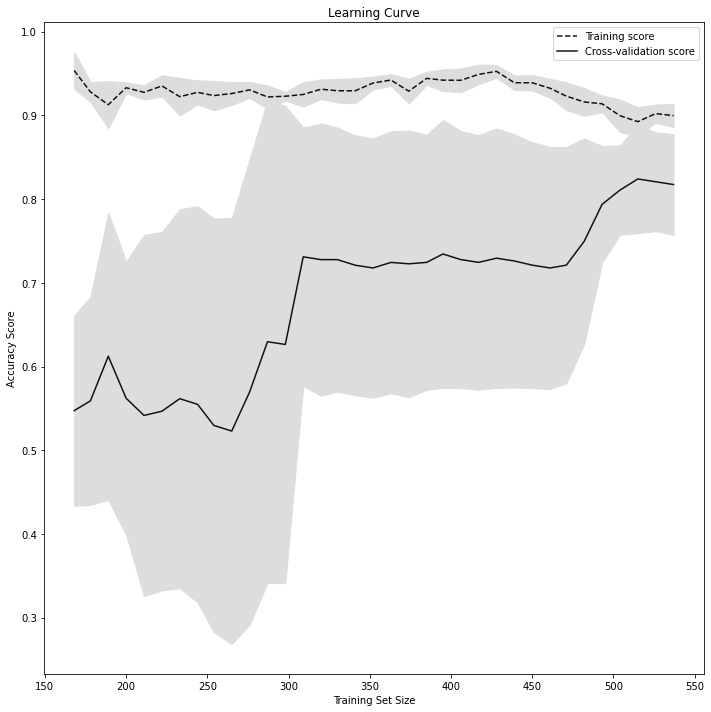

In [71]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(scv, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
    
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

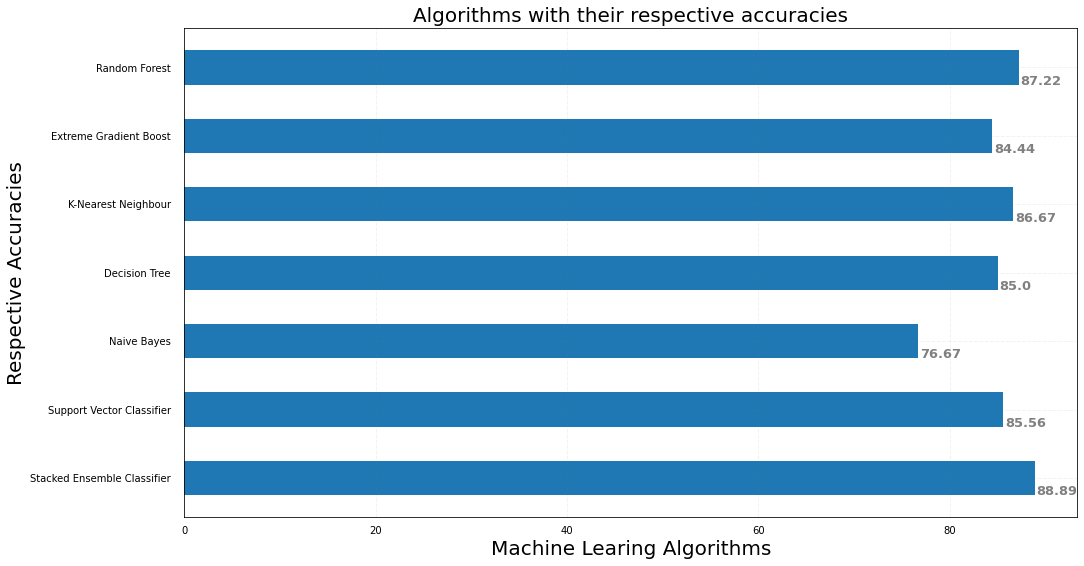

In [54]:
model_ev = pd.DataFrame({'Model': ['Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Naive Bayes', 'Support Vector Classifier','Stacked Ensemble Classifier'], 
                         'Accuracy': [rfc_acc_score,xgb_acc_score,knn_acc_score,tree_acc_score,nb_acc_score, svc_acc_score, scv_acc_score]})
model_ev
# fig = plt.figure(figsize = (17, 5))
# plt.bar(model_ev.Model, model_ev.Accuracy*100, color ='steelblue',
#         width = 0.3)
 
# plt.xlabel("Machine Learing Algorithms")
# plt.ylabel("Respective Accuracies")
# plt.title("Algorithms wit
h their respective accuracies")
# plt.show()


fig, ax = plt.subplots(figsize =(16,9))
ax.barh(model_ev.Model, model_ev.Accuracy*100,height=0.5)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 13, fontweight ='bold',
             color ='grey')
plt.xlabel("Machine Learing Algorithms",fontsize = 20)
plt.ylabel("Respective Accuracies",fontsize = 20)
plt.title("Algorithms with their respective accuracies",fontsize = 20)
plt.show()

In [65]:
# print(X_test)
X_sample = [[63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0]]
d=pd.DataFrame(X_sample)
p = scv.predict(d)
print(p)

[1.]


In [ ]:
import tkinter as tk
r = tk.Tk()
r.title('Counting Seconds')
button = tk.Button(r, text='Stop', width=25, command=r.destroy)
button.pack()
r.mainloop()

In [75]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
        TP = conf_matrix[1][1]
        TN = conf_matrix[0][0]
        FP = conf_matrix[0][1]
        FN = conf_matrix[1][0]
        print('True Positives:', TP)
        print('True Negatives:', TN)
        print('False Positives:', FP)
        print('False Negatives:', FN)

        # calculate accuracy
        conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

        # calculate mis-classification
        conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
        conf_sensitivity = (TP / float(TP + FN))
        # calculate the specificity
        conf_specificity = (TN / float(TN + FP))

        # calculate precision
        conf_precision = (TN / float(TN + FP))
        # calculate f_1 score
        conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
        print('-'*50)
        print(f'Accuracy: {round(conf_accuracy,4)}') 
        print(f'Mis-Classification: {round(conf_misclassification,2)}') 
        print(f'Sensitivity: {round(conf_sensitivity,4)}') 
        print(f'Specificity: {round(conf_specificity,4)}') 
        print(f'Precision: {round(conf_precision,2)}')
        print(f'f_1 Score: {round(conf_f1,2)}')

In [49]:
#Ensemble Technique
confusion_metrics(scv_conf_matrix)

True Positives: 65
True Negatives: 95
False Positives: 13
False Negatives: 7
--------------------------------------------------
Accuracy: 0.8889
Mis-Classification: 0.11
Sensitivity: 0.9028
Specificity: 0.8796
Precision: 0.88
f_1 Score: 0.89


In [50]:
#Naive Bayes
confusion_metrics(nb_conf_matrix)

True Positives: 53
True Negatives: 85
False Positives: 23
False Negatives: 19
--------------------------------------------------
Accuracy: 0.7667
Mis-Classification: 0.23
Sensitivity: 0.7361
Specificity: 0.787
Precision: 0.79
f_1 Score: 0.76


In [52]:
#Support Vector
confusion_metrics(svc_conf_matrix)

True Positives: 63
True Negatives: 91
False Positives: 17
False Negatives: 9
--------------------------------------------------
Accuracy: 0.8556
Mis-Classification: 0.14
Sensitivity: 0.875
Specificity: 0.8426
Precision: 0.84
f_1 Score: 0.86


In [53]:
#KNN
confusion_metrics(knn_conf_matrix)

True Positives: 63
True Negatives: 93
False Positives: 15
False Negatives: 9
--------------------------------------------------
Accuracy: 0.8667
Mis-Classification: 0.13
Sensitivity: 0.875
Specificity: 0.8611
Precision: 0.86
f_1 Score: 0.87


In [54]:
#XGB
confusion_metrics(xgb_conf_matrix)

True Positives: 61
True Negatives: 91
False Positives: 17
False Negatives: 11
--------------------------------------------------
Accuracy: 0.8444
Mis-Classification: 0.16
Sensitivity: 0.8472
Specificity: 0.8426
Precision: 0.84
f_1 Score: 0.84


In [55]:
#Decision Tree
confusion_metrics(tree_conf_matrix)

True Positives: 66
True Negatives: 87
False Positives: 21
False Negatives: 6
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.9167
Specificity: 0.8056
Precision: 0.81
f_1 Score: 0.86


In [56]:
#Random Forest
confusion_metrics(rfc_conf_matrix)

True Positives: 64
True Negatives: 93
False Positives: 15
False Negatives: 8
--------------------------------------------------
Accuracy: 0.8722
Mis-Classification: 0.13
Sensitivity: 0.8889
Specificity: 0.8611
Precision: 0.86
f_1 Score: 0.87


In [76]:
confusion_metrics(lr_conf_matrix)

True Positives: 54
True Negatives: 79
False Positives: 29
False Negatives: 18
--------------------------------------------------
Accuracy: 0.7389
Mis-Classification: 0.26
Sensitivity: 0.75
Specificity: 0.7315
Precision: 0.73
f_1 Score: 0.74


In [25]:
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

ModuleNotFoundError: No module named 'plotly'